In [1]:
! pip install opencv-python

In [2]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

# 복습

In [3]:
import glob

In [7]:
img_files = glob.glob('./fig/images/*.*') # ??

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN) 

idx = 0

while True:
    img = cv2.imread(img_files[idx])
    
    cv2.imshow('scene', img)

    if cv2.waitKey(3000) == 27:
        break

    idx += 1
    if idx >= len(img_files):
        idx = 0

cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('./fig/images/imgbin_sunglasses_1.png', cv2.IMREAD_UNCHANGED) # UNCHANGED -> 알파 채널 있을때만

mask = src[:, :, -1]

cv2.imshow('mask', mask)
cv2.waitkey()
cv2.destroyAllWindows()

In [3]:
img = np.full((600, 1200, 3), 255, np.uint8)

cv2.line(img, (50, 50), (200, 100), (0, 0, 255), 5, cv2.LINE_AA)


cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
# 영상
cap = cv2.VideoCapture(0) 

if not cap.isOpened():
    print('video open failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h)) 

while True:

    ret, frame = cap.read()

    if not ret :
        print('frame open failed')
        break
    edge = cv2.Canny(frame, 50, 150)
    frame_flip = cv2.flip(frame, 1)

    out.write(frame_flip)

    cv2.imshow('frame', frame)
    cv2.imshow('edge', edge)
    cv2.imshow('frame_flip', frame_flip)

    if cv2.waitKey(30) == 27:
        break

out.release()
cap.release()
cv2.destroyAllWindows()

In [7]:
img = cv2.imread('./fig/images/lenna.bmp', 0)

cv2.imshow('img', img)

while True:
    key = cv2.waitKey()

    if key == 27 or key == ord('q'):
        break

    elif key == ord('i'):
        img = 255 - img
        cv2.imshow('img', img)

    elif key == ord('f'):
        img = cv2.flip(img, 1)
        cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
cap = cv2.VideoCapture(0)

f_flag = False # flag ???
i_flag = False

while True:
    ret, frame = cap.read()

    if f_flag:
        frame = cv2.flip(frame, 1)

    if i_flag:
        frame = cv2.Canny(frame, 50, 150)

    cv2.imshow('image', frame)

    key = cv2.waitKey(20)

    if key == 27:
        break

    elif key == ord('f'):
        f_flag = not f_flag
   
    elif key == ord('i'):
        i_flag = not i_flag

cap.release()    
cv2.destroyAllWindows()

In [11]:
def onMouse(event, x, y, flags, params):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 10, cv2.LINE_AA)
            cv2.imshow('img', img)
            oldx, oldy = x, y

img = np.ones((480, 640, 3), np.uint8)*255

cv2.namedWindow('img')
cv2.setMouseCallback('img', onMouse, img)
cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
def onMouse(pos):
    img[:] = np.round(img1*(pos/255), 0).astype(np.uint8)
    cv2.imshow('img', img)


# img = np.zeros((480, 640), np.uint8)
img = cv2.imread('./fig/images/lenna.bmp', 0)
img1 = img.copy()

cv2.namedWindow('img')
cv2.createTrackbar('Level', 'img', 0, 255, onMouse)
cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
import time

In [18]:
tm = cv2.TickMeter()  # 연산 시간 보고 싶을 때

t1 = time.time()
tm.start()

img = cv2.imread('./fig/images/lenna.bmp')
blur = cv2.GaussianBlur(img, (0, 0), 1) # 가우시안 블러링

t2 = time.time()
print((t2 - t1)*1000) # time.time() 함수로 하는 방법
tm.stop()
print(tm.getTimeMilli(), 'ms') # TickMeter 메소드로 하는 방법 

1.2516975402832031
1.5513000000000001 ms


In [7]:
img = cv2.imread('./fig/images/lenna.bmp', 1)

img1 = np.clip(img + 100., 0, 255).astype(np.uint8) # 100. 소수점 ???
img2 = cv2.add(img, (100, 100, 100, 0)) # 0 -> channel ???

cv2.imshow('img', img)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
src1 = cv2.imread('./fig/images/lenna256.bmp', 0)
src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.7, src2, 0.3, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)


cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('add', dst1)
cv2.imshow('weighted', dst2)
cv2.imshow('subtract', dst3)
cv2.imshow('abs', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
src1 = np.zeros((256, 256), np.uint8)
cv2.rectangle(src1, (10, 10), (128, 240), 255, -1)

src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 255, -1)

bit_and = cv2.bitwise_and(src1, src2)
bit_or = cv2.bitwise_or(src1, src2)
bit_xor = cv2.bitwise_xor(src1, src2)
bit_not = cv2.bitwise_not(src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('bit_and', bit_and)
cv2.imshow('bit_or', bit_or) 
cv2.imshow('bit_xor', bit_xor) 
cv2.imshow('bit_not', bit_not) 

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
img = cv2.imread('./fig/images/flowers.jpg')

b, g, r = cv2.split(img)

img_merge = cv2.merge((b, g, r)) # 이미지 합칠 때

cv2.imshow('flower', img)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.imshow('flower_merg', img_merge)

cv2.waitKey()
cv2.destroyAllWindows()

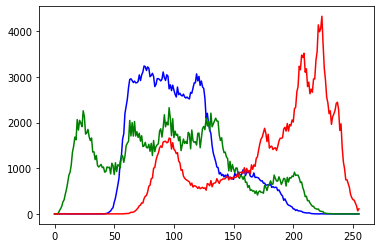

In [12]:
def getGrayHistImage(hist):
    imgHist = np.full((200, 256), 255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 200)
        pt2 = (x, 200 - int(hist[x, 0] * 200 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)

    return imgHist

img = cv2.imread('./fig/images/lenna.bmp', 1) # 0 -> gray channel

# hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])
# hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
# hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])

# plt.plot(hist_b, color = 'b')
# plt.plot(hist_g, color = 'g')
# plt.plot(hist_r, color = 'r')

plt.show()

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()



In [16]:
src = cv2.imread('./fig/images/puppy_shrink.png', 0)

# hist = cv2.calcHist([src], [0], None, [256], [0, 256]) # [0, 256] -> 0 ~ 255 
# plt.plot(hist)
# plt.show()

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src, None)
print('minVal', minVal)
print('maxVal', maxVal)
print('minLoc', minLoc)
print('maxLoc', maxLoc)
dst_norm = np.clip((src-minVal)*255/(maxVal-minVal) + 0., 0, 255).astype(np.uint8)
dst_norm_2 = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
dst_equ = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_norm_2', dst_norm_2)
cv2.imshow('dst_equ', dst_equ)

cv2.waitKey()
cv2.destroyAllWindows()

minVal 100.0
maxVal 184.0
minLoc (293, 169)
maxLoc (369, 80)


In [19]:
src = cv2.imread('./fig/images/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv) # 분리

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX) # 노멀라이징
v_equal = cv2.equalizeHist(v) # 이퀄라이징

dst_norm = cv2.merge((h, s, v_norm)) # 분리한거 다시 합침
dst_equal = cv2.merge((h, s, v_equal))

dst_norm = cv2.cvtColor(dst_norm, cv2.COLOR_HSV2BGR) 
dst_equal = cv2.cvtColor(dst_equal, cv2.COLOR_HSV2BGR) # 왜 다시 HSV2BGR을 하지? 

cv2.imshow('src', src)
cv2.imshow('norm', dst_norm)
cv2.imshow('equal', dst_equal)

# cv2.imshow('src',src)
# cv2.imshow('hue', h)
# cv2.imshow('saturation', s) # 여러색이 섞이면 탁하게 나옴
# cv2.imshow('value', v)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
def ontrack(pos):
    hmin = cv2.getTrackbarPos('h_min', 'dst')
    hmax = cv2.getTrackbarPos('h_max', 'dst')
    smin = cv2.getTrackbarPos('s_min', 'dst')

    dst = cv2.inRange(src_hsv, (hmin, smin, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)

src = cv2.imread('./fig/images/palette.png')
# src = cv2.imread('./fig/images/palette_dark.png')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV) # google에서 hsv 색상표 참고

# src_bgr = cv2.inRange(src, (0, 128, 0), (50, 255, 50)) # (b, g, r)
# src_hsv = cv2.inRange(src, (50, 160, 0), (70, 255, 255)) # (h, s, v) 

cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('h_min', 'dst', 20, 179, ontrack)
cv2.createTrackbar('h_max', 'dst', 100, 179, ontrack)
cv2.createTrackbar('s_min', 'dst', 60, 255, ontrack)

# cv2.imshow('src_bgr', src_bgr)
# cv2.imshow('src_hsv', src_hsv)

cv2.waitKey()
cv2.destroyAllWindows()